### Titanic Exploratory Data Analysis (EDA) with Pandas

In [128]:
import pandas as pd
import seaborn as sb
%pylab inline 
df = pd.read_csv("../Data/train.csv");  #Read training data set into Pandas data frame

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axis']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [48]:
df.head() #Let's take a look at first 5 rows of the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
df.shape # Size of the training data set

(891, 12)

In [121]:
df.columns # Column Names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [123]:
df.info() # Data types and Non-NULL information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [50]:
df.describe() # Summary Statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df.Survived.value_counts() # Survival Counts -> 342 out of 891

0    549
1    342
Name: Survived, dtype: int64

In [52]:
(sum(df.Survived==1)/df.shape[0])*100   # Percentage survived -> 38.38%

38.383838383838381

In [53]:
df.shape[0]

891

In [127]:
df.groupby("Pclass")["Pclass"].count() # Number of Passengers in each Class

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

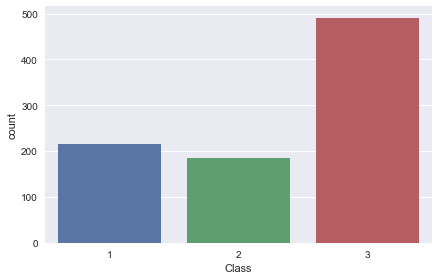

In [129]:
# Using Seaborn to plot Number of Passenger per Class
fig=sb.factorplot('Pclass',data=df,kind="count", aspect=1.5)
fig.set_xlabels('Class')

In [57]:
df.Sex.value_counts() # Count of males & females on the Ship

male      577
female    314
Name: Sex, dtype: int64

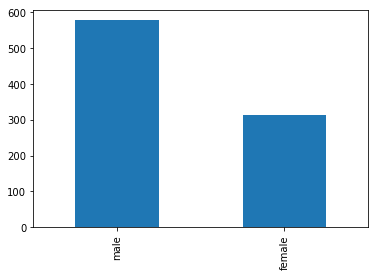

In [62]:
df.Sex.value_counts().plot(kind='bar') # Plot bar chart for male & female counts

In [72]:
df[df.Sex.isnull()] #See if there are any NULL values in Sex column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [133]:
df.groupby(["Sex","Pclass"])["Sex"].count() # Number of men and women in each Passenger class

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

### More than two times Males compared to Females in Class 3

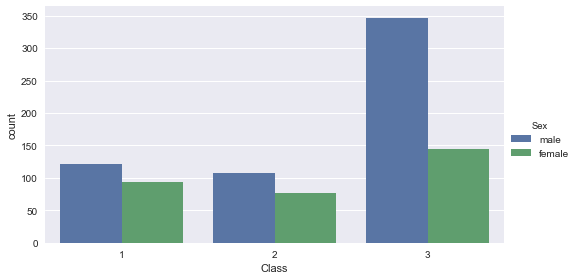

In [136]:
#Use Seaborn to plot by Sex and Class
fig=sb.factorplot('Pclass',data=df,hue="Sex",kind="count",aspect=1.75)
fig.set_xlabels("Class")

In [73]:
df[df.Survived==1] # Explore records associated with Survived Passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [138]:
# Number of passengers who survived in each class grouped by sex. Also total was found for each class grouped by sex.
df.pivot_table("Survived","Sex","Pclass",aggfunc=np.sum,margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91.0,70.0,72.0,233.0
male,45.0,17.0,47.0,109.0
All,136.0,87.0,119.0,342.0


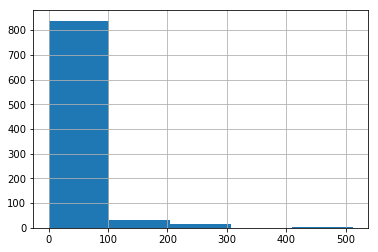

In [80]:
df.Fare.hist(bins=5) # Distribution of Fare with 5 bins

In [82]:
df[df.Fare==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [87]:
df[df.Cabin.isnull()] #Check for Null values in Cabin column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [89]:
df.isnull().sum() #Get count of NULL values in all columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### As you can see from below bar plots, females had better survival rate compared to males.  1 = Survived, 0 = Not-Survived.

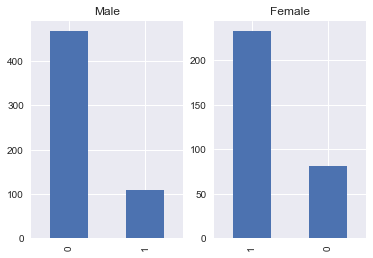

In [168]:
fig,axis=plt.subplots(1,2)
df[df.Sex=='male'].Survived.value_counts().plot(kind="bar",ax=axis[0],title="Male",sort_columns=True)
df[df.Sex=='female'].Survived.value_counts().plot(kind="bar",ax=axis[1],title="Female",sort_columns=True)
#ax.set_xticklabels(('Survived', 'Not-Survived'))

## Children under 5 had good survival rate: 70%

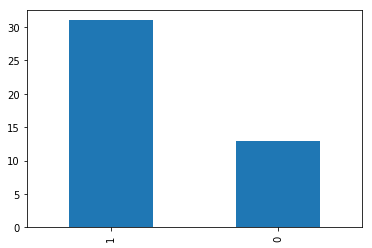

In [116]:
df[df.Age<=5].Survived.value_counts().plot(kind="bar")

In [117]:
df[df.Age<=5].Survived.value_counts()

1    31
0    13
Name: Survived, dtype: int64

In [118]:
31/44

0.7045454545454546

### Distribution of age

In [141]:
age=df.Age.dropna()  # Drop records with missing Age 

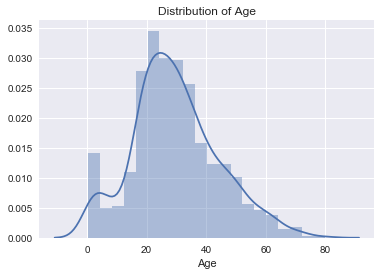

In [143]:
age_dist=sb.distplot(age)
age_dist.set_title("Distribution of Age")

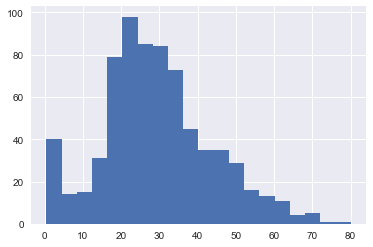

In [149]:
df.Age.hist(bins=20)  # Histogram of Ages

### Where did Passengers in different Classes board the Ship

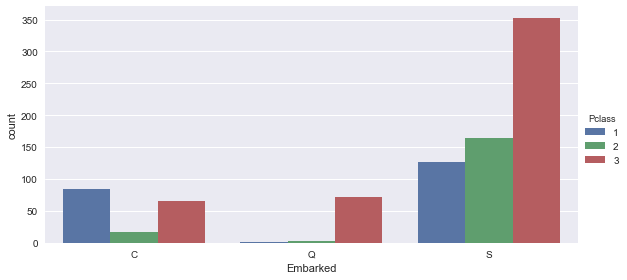

In [152]:
sb.factorplot('Embarked', data=df, kind='count', hue='Pclass', hue_order=range(1,4), aspect=2,
              order = ['C','Q','S'])

Most of the passengers that boarded at Queenstown were in 3rd class. Whereas, many that boarded at Cherbourg were in 1st class. Highest portion of overall passengers boarded at Southampton.

In [160]:
# Get Passenger count by Class and Boarding town
port = pd.crosstab(index=[df.Pclass], columns=[df.Embarked])
port.index=[['First','Second','Third']]
port.columns = [['Cherbourg','Queenstown','Southampton']]
port

,Cherbourg,Queenstown,Southampton
First,85,2,127
Second,17,3,164
Third,66,72,353
